In [1]:
# Importing the necessary libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from kaggle.api.kaggle_api_extended import KaggleApi

In [2]:
# Authenticating and using Kaggle API to download the dataset
api = KaggleApi()
api.authenticate()
dataset = 'hmavrodiev/london-bike-sharing-dataset'
api.dataset_download_files(dataset, path='./', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset


In [14]:
# Reading the dataset into a pandas DataFrame
rides = pd.read_csv("london_merged.csv")

# Inspecting the first few rows of the dataset
rides.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [15]:
# Checking the data types and for any missing values
rides.info()

missing_values = rides.isnull().sum()
print("Missing values in each column:\n", missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB
Missing values in each column:
 timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64


In [16]:
# Converting timestamp column to datetime format
rides['timestamp'] = pd.to_datetime(rides['timestamp'])

In [17]:
# Re-inspecting the dataset to confirm changes
print(rides.head())
print(rides.info())

            timestamp  cnt   t1   t2    hum  wind_speed  weather_code  \
0 2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
1 2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2 2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
3 2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
4 2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

   is_holiday  is_weekend  season  
0         0.0         1.0     3.0  
1         0.0         1.0     3.0  
2         0.0         1.0     3.0  
3         0.0         1.0     3.0  
4         0.0         1.0     3.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  f

In [18]:
# Renaming columns for better readability
rides.rename(columns={
    'timestamp': 'time',
    'cnt': 'count', 
    't1': 'temp_real_C',
    't2': 'temp_feels_like_C',
    'hum': 'humidity_percent',
    'wind_speed': 'wind_speed_kph',
    'weather_code': 'weather',
    'is_holiday': 'is_holiday',
    'is_weekend': 'is_weekend',
    'season': 'season'
}, inplace=True)

In [21]:
# Mapping numerical season and weather codes to descriptive names
season_mapping = {0.0: 'spring', 1.0: 'summer', 2.0: 'autumn', 3.0: 'winter'}
weather_mapping = {1.0: 'Clear', 2.0: 'Scattered clouds', 3.0: 'Broken clouds', 4.0: 
                   'Cloudy', 7.0: 'Rain', 10.0: 'Rain with thunderstorm', 26.0: 'Snowfall'}

rides['season'] = rides['season'].map(season_mapping)
rides['weather'] = rides['weather'].map(weather_mapping)
rides.head()


,time,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,0.0,1.0,winter
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,0.0,1.0,winter
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,0.0,1.0,winter
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,0.0,1.0,winter
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,0.0,1.0,winter


In [22]:
# Extracting additional features from the time column
rides['hour'] = rides['time'].dt.hour
rides['day_of_week'] = rides['time'].dt.dayofweek
rides['month'] = rides['time'].dt.month

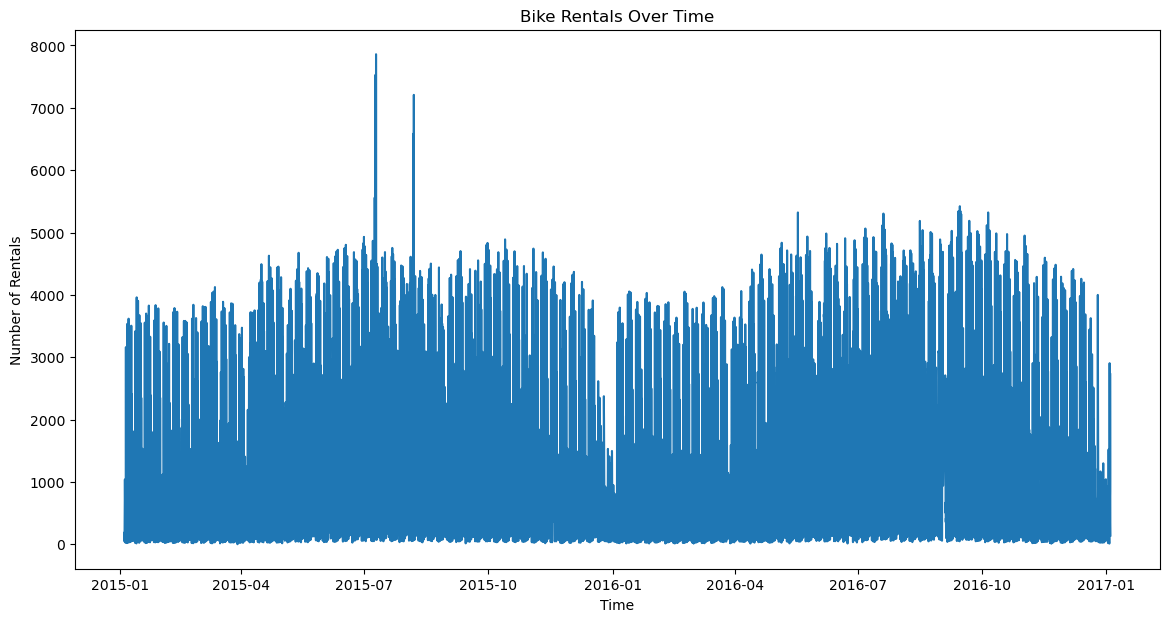

In [23]:
# Visualizing bike rentals over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=rides, x='time', y='count')
plt.title('Bike Rentals Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Rentals')
plt.show()

In [25]:
# Calculating the difference between actual and feels-like temperature
rides['temp_diff'] = rides['temp_real_C'] - rides['temp_feels_like_C']
rides.head()

,time,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season,hour,day_of_week,month,temp_diff
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,0.0,1.0,winter,0,6,1,1.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,0.0,1.0,winter,1,6,1,0.5
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,0.0,1.0,winter,2,6,1,0.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,0.0,1.0,winter,3,6,1,0.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,0.0,1.0,winter,4,6,1,2.0


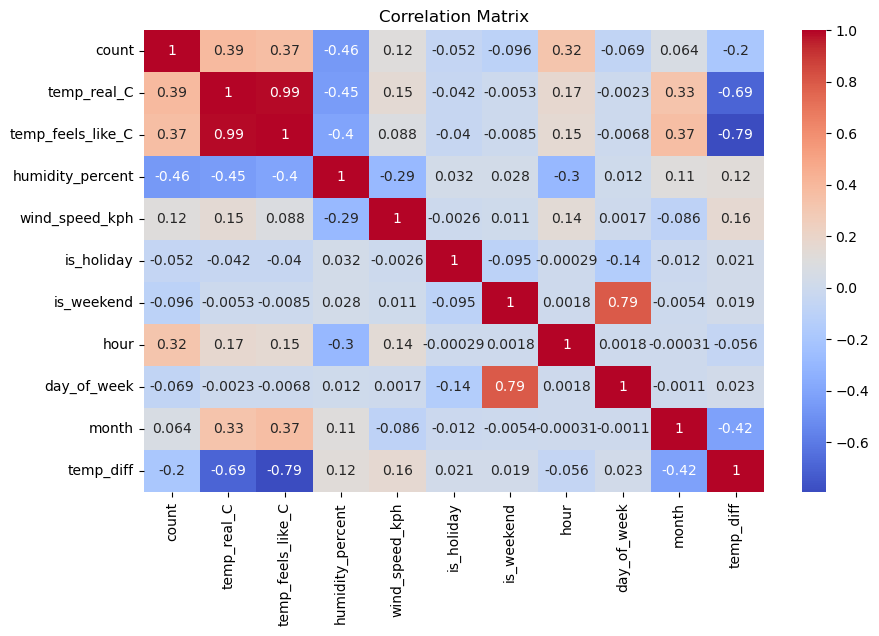

In [26]:
# Generating a correlation matrix (selecting only numeric columns)
numeric_columns = rides.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

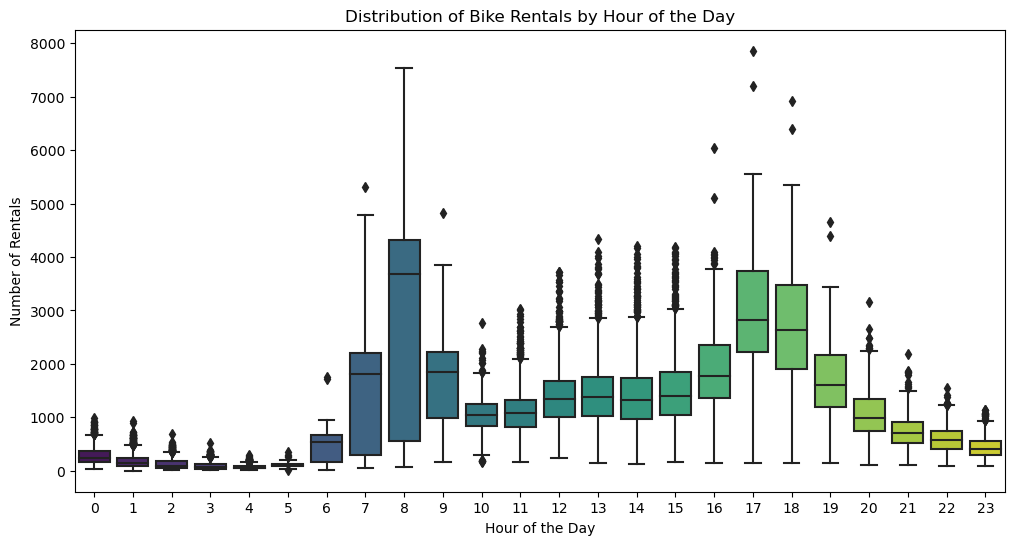

In [28]:
# Distribution of rentals by hour using a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=rides, x='hour', y='count', palette='viridis')
plt.title('Distribution of Bike Rentals by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rentals')
plt.show()

In [29]:
# Saving the final dataframe to an Excel file for Tableau visualization
rides.to_excel('london_merged_final.xlsx', sheet_name='Data', index=False)